In [1]:
import pandas as pd
from pathlib import Path
import glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Beers 

In [32]:
beers = pd.read_csv('../data/beer_ratings.csv')
beers.sample(3)

,brewery_name,beer_name,beer_style,beer_abv,num_reviews,rating,city,state
3015,Real Ale Brewing Company,Empire (Barrel-Aged Lost Gold IPA),American IPA,6.6,7,4.07,Blanco,TX
1363,Founders Brewing Company,Founders Big Froot,Fruit / Vegetable Beer,6.8,3,3.33,Grand Rapids,MI
3413,Sly Fox Brewing Company,First Gold IPA,American IPA,7.0,1,3.50,Phoenixville,PA


## Exploratory Data Analysis

In [33]:
beers.shape

(4640, 8)

In [4]:
# Is there any missing data?
beers.isnull().sum()

brewery_name    0
beer_name       0
beer_style      0
beer_abv        0
num_reviews     0
rating          0
city            0
state           0
dtype: int64

In [5]:
# How many unique beer styles are there?
beers['beer_style'].nunique()

98

In [6]:
# What are the most frequent beer styles?
top_styles=beers['beer_style'].value_counts().sort_values(ascending=False).head(10)
top_styles

American IPA                        393
American Pale Ale (APA)             281
American Porter                     190
American Amber / Red Ale            184
American Double / Imperial IPA      173
Saison / Farmhouse Ale              163
American Double / Imperial Stout    111
American Brown Ale                  107
Fruit / Vegetable Beer              107
American Stout                      102
Name: beer_style, dtype: int64

In [34]:
# Which beers have the highest ABV?
beers.sort_values(by = 'beer_abv', ascending=True).head(5)

,brewery_name,beer_name,beer_style,beer_abv,num_reviews,rating,city,state
3634,Southampton Publick House,Southampton Berliner Weisse,Berliner Weissbier,2.0,41,4.77,Southampton,NY
2040,Iron Hill Brewery & Restaurant,Belgian Single,Low Alcohol Beer,2.5,5,3.50,Wilmington,DE
2207,Iron Hill Brewery & Restaurant,Pugilist,English Dark Mild Ale,2.6,2,3.75,Wilmington,DE
2043,Iron Hill Brewery & Restaurant,Berliner Weiss,Berliner Weissbier,2.8,59,4.00,Wilmington,DE
1467,Founders Brewing Company,Founders Trois,English Bitter,3.0,2,4.25,Grand Rapids,MI


In [8]:
# How many beers have a perfect rating?
len(beers[beers['rating']==5.00])

51

In [9]:
# Among beers with at least 25 ratings, what were the most popular?
beers.loc[beers['num_reviews']>=25].sort_values(by='rating', ascending=False).head(5)

,brewery_name,beer_name,beer_style,beer_abv,num_reviews,rating,city,state
2563,Marble Brewery,Imperial Porter,American Porter,8.3,67,5.00,Albuquerque,NM
2557,Marble Brewery,Bourbon Barrel Imperial Stout,American Double / Imperial Stout,11.0,43,5.00,Albuquerque,NM
3634,Southampton Publick House,Southampton Berliner Weisse,Berliner Weissbier,2.0,41,4.77,Southampton,NY
4050,The Alchemist,Heady Topper,American Double / Imperial IPA,8.0,469,4.63,Waterbury,VT
2152,Iron Hill Brewery & Restaurant,Imperial IPA,American Double / Imperial IPA,7.8,965,4.60,Wilmington,DE


In [10]:
# Among beers with at least 25 ratings, what were the LEAST popular?
beers.loc[beers['num_reviews']>=25].sort_values(by='rating', ascending=True).head(5)

,brewery_name,beer_name,beer_style,beer_abv,num_reviews,rating,city,state
1482,Four Horsemen Brewing Company,Rye IPA,Rye Beer,7.8,113,2.00,South Bend,IN
1477,Four Horsemen Brewing Company,Hefeweizen,Hefeweizen,6.0,864,2.00,South Bend,IN
3714,Sprecher Brewing Company,Mbege Ale,Fruit / Vegetable Beer,7.0,40,2.16,Glendale,WI
2869,O'Fallon Brewery,Light,English Dark Mild Ale,4.5,87,2.25,O'Fallon,MO
4128,Tommyknocker Brewery,Tundrabeary Ale,Fruit / Vegetable Beer,4.7,52,2.31,Idaho Springs,CO


[Four Horsemen. The worst brewery of 2013.](https://www.southbendtribune.com/news/business/four-horsemen-taps-out/article_1b899388-4579-11e3-b9ce-0019bb30f31a.html)

## Feature Engineering

In [38]:
beers['beer_style'][0]

'American Double / Imperial IPA'

In [39]:
'Double' in beers['beer_style'][0]

True

In [48]:
def double_trouble(row):
    if 'Double' in row:
        return 1
    else:
        return 0

In [49]:
beers['newvar']=beers['beer_style'].apply(double_trouble)

In [50]:
beers.head()

,brewery_name,beer_name,beer_style,beer_abv,num_reviews,rating,city,state,newvar
0,21st Amendment Brewery,21 Rock,American Double / Imperial IPA,9.7,2,4.00,San Francisco,CA,1
1,21st Amendment Brewery,21st Amendment IPA,American IPA,7.0,650,3.89,San Francisco,CA,0
2,21st Amendment Brewery,21st Amendment Imperial Stout,Russian Imperial Stout,10.0,4,3.88,San Francisco,CA,0
3,21st Amendment Brewery,21st Amendment Pale Ale,American Pale Ale (APA),5.5,7,3.86,San Francisco,CA,0
4,21st Amendment Brewery,5-South,American Pale Ale (APA),6.0,3,4.00,San Francisco,CA,0


In [11]:
# Let's shrink our dataset 
beers=beers[['beer_style', 'beer_abv']]

In [12]:
# Now convert those beer styles to "dummy" columns
beers2=pd.get_dummies(beers, columns = ['beer_style'], prefix='', prefix_sep='')

In [13]:
# We now have one column for every style!
beers2.columns

Index(['beer_abv', 'Altbier', 'American Adjunct Lager',
       'American Amber / Red Ale', 'American Amber / Red Lager',
       'American Barleywine', 'American Black Ale', 'American Blonde Ale',
       'American Brown Ale', 'American Dark Wheat Ale',
       'American Double / Imperial IPA', 'American Double / Imperial Pilsner',
       'American Double / Imperial Stout', 'American IPA',
       'American Malt Liquor', 'American Pale Ale (APA)',
       'American Pale Lager', 'American Pale Wheat Ale', 'American Porter',
       'American Stout', 'American Strong Ale', 'American Wild Ale',
       'Baltic Porter', 'Belgian Dark Ale', 'Belgian IPA', 'Belgian Pale Ale',
       'Belgian Strong Dark Ale', 'Belgian Strong Pale Ale',
       'Berliner Weissbier', 'Bière de Garde', 'Black & Tan', 'Bock',
       'Braggot', 'California Common / Steam Beer', 'Chile Beer', 'Cream Ale',
       'Czech Pilsener', 'Doppelbock', 'Dortmunder / Export Lager', 'Dubbel',
       'Dunkelweizen', 'Eisbock', 'Engli

In [14]:
beers2.head()

,beer_abv,Altbier,American Adjunct Lager,American Amber / Red Ale,American Amber / Red Lager,American Barleywine,American Black Ale,American Blonde Ale,American Brown Ale,American Dark Wheat Ale,...,Scotch Ale / Wee Heavy,Scottish Ale,Scottish Gruit / Ancient Herbed Ale,Smoked Beer,Tripel,Vienna Lager,Weizenbock,Wheatwine,Winter Warmer,Witbier
0,9.7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Declare your target variable.
y = beers2['beer_abv']

In [16]:
# Declare your feature variables. We also drop the most frequent category as our "comparison".
X = beers2.drop(['beer_abv', 'American IPA'], axis=1)

## Split, fit and predict

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [18]:
# instantiate the sklearn regression class and fit it to your training data.

linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
# predict the y-values
y_pred = linreg.predict(X_test)

## Evaluate your model

In [20]:
from math import sqrt
# On average, by how much value are we missing the mark?
rmse = sqrt(metrics.mean_squared_error(y_test, y_pred))
print('On average, our model errs by ', round(rmse))

On average, our model errs by  1


In [21]:
# So... what if we just flipped a coin?
avg_val=round(y_train.mean())
print('The average ABV is', avg_val)

# Then the average error of our model would be:
comparison_array=np.full((len(y_test), ), avg_val)
coin_flip=sqrt(metrics.mean_squared_error(y_test, comparison_array))
print('If we just used that to predict ABV, our avg error would be:')
print('ABV units',round( coin_flip))

The average ABV is 7
If we just used that to predict ABV, our avg error would be:
ABV units 2


In [22]:
# So is our model better than flipping a coin?
print('A good model will reduce error!')
print('ABV units', round(rmse-coin_flip))

A good model will reduce error!
ABV units -1


In [23]:
# A higher R2 score indicates more variance explained.
r2=metrics.r2_score(y_test, y_pred)
round(r2,2)

0.62

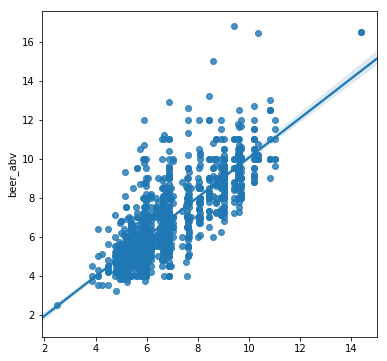

In [24]:
# Let's display our predictions vs. real values.
plt.figure(figsize=(6, 6))
sns.regplot(x=y_pred, y=y_test);

### Check out a single prediction

In [25]:
# What's the first beer in the testing dataset? (Note that y_test keeps its original index).
X_test.head()

,Altbier,American Adjunct Lager,American Amber / Red Ale,American Amber / Red Lager,American Barleywine,American Black Ale,American Blonde Ale,American Brown Ale,American Dark Wheat Ale,American Double / Imperial IPA,...,Scotch Ale / Wee Heavy,Scottish Ale,Scottish Gruit / Ancient Herbed Ale,Smoked Beer,Tripel,Vienna Lager,Weizenbock,Wheatwine,Winter Warmer,Witbier
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# What type of beer is it?
X_test.loc[843].head(20)

Altbier                               0
American Adjunct Lager                0
American Amber / Red Ale              0
American Amber / Red Lager            0
American Barleywine                   0
American Black Ale                    0
American Blonde Ale                   0
American Brown Ale                    0
American Dark Wheat Ale               0
American Double / Imperial IPA        0
American Double / Imperial Pilsner    0
American Double / Imperial Stout      0
American Malt Liquor                  0
American Pale Ale (APA)               0
American Pale Lager                   0
American Pale Wheat Ale               0
American Porter                       0
American Stout                        0
American Strong Ale                   0
American Wild Ale                     1
Name: 843, dtype: uint8

In [27]:
# How does its true ABV compare to its predicted ABV? (Note that for y_pred, the index has been reset)
print('actual ABV', y_test[843])
print('predicted ABV', round(y_pred[0]))

actual ABV 7.75
predicted ABV 8.0


In [28]:
# Were there a lot of beers of that type?
beer_filter=beers.loc[beers['beer_style']=="American Wild Ale"]
print(len(beer_filter))
print(beer_filter.head())

85
            beer_style  beer_abv
145  American Wild Ale      5.00
187  American Wild Ale      5.20
219  American Wild Ale      7.68
226  American Wild Ale      9.00
233  American Wild Ale      8.65


In [29]:
# What was the average ABV of all beers of that type?
beer_filter['beer_abv'].mean()

7.61576470588235

In [30]:
# How similar is that to our prediction for the first beer?